시계열 데이터
  - 과거의 정보가 현재에 영향을 미치는 데이터들
  - 주식, 날씨 등등, 언어, 유전자데이터, 복권들...

In [ ]:
!pip install hmmlearn
!pip install pystruct
!pip install cvxopt
!pip install timeseries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
filepath = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/date_31.txt'
pd.read_csv(filepath,header=None).head(2)

,0,1,2,3
0,1900,1,97.91,73.28
1,1900,2,86.80,63.82


In [7]:
# 파일 로드 함수
def read_data(input_file, index):
  input_data = np.loadtxt(input_file, delimiter=',')
  # 문자열을 판다스 날짜 형식으로 반환 lambda
  to_date = lambda x , y  : str(int(x)) + '-' + str(int(y))
  # 시작 날짜추출
  start = to_date(input_data[0,0],input_data[0,1])
  # 종료 날짜 추출
  if input_data[-1,1] == 12:
    year = input_data[-1,0]+1
    month = 1
  else:
    year = input_data[-1,0]
    month = input_data[-1,1] + 1
  end = to_date(year,month)
  # 월별 빈도로 날짜리스트 생성
  date_indices =  pd.date_range(start,end, freq='M')
  # 데이터 시리즈 생성 - 시간정보 - 타임스탬프를 추가  
  output = pd.Series(input_data[:,index], index = date_indices) 
  return output

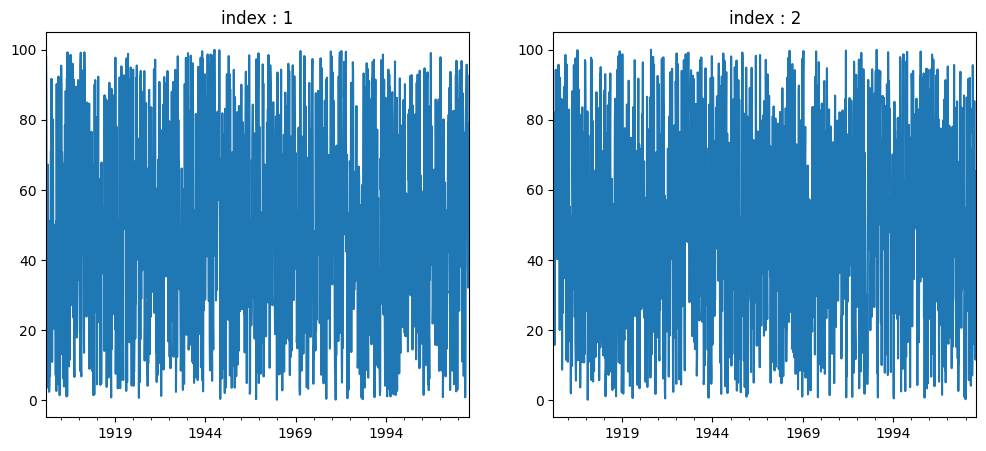

In [42]:
# 시계열 데이터로 변환할 열 지정
indeces = [2,3]
plt.figure(figsize=(12,5))
for idx,index in enumerate(indeces):
  timeseries = read_data(input_file=filepath, index=index)
  # 데이터를 그린다.
  plt.subplot(1,2,idx+1)
  timeseries.plot()
  plt.title(f"index : {index-1}")

In [43]:
pd.read_csv(filepath,header=None).head(2)

,0,1,2,3
0,1900,1,97.91,73.28
1,1900,2,86.80,63.82


In [44]:
read_data(filepath,2).head(5)

1900-01-31    97.91
1900-02-28    86.80
1900-03-31     3.56
1900-04-30     7.22
1900-05-31    46.78
Freq: M, dtype: float64

시계열 데이터를 슬라이싱
  - 분할 : 다양한 하위간격으로 나누고 관련 정보를 추출하는 과정
  - 인덱스 대신에 타이스템프을 사용해서 데이터를 분할

In [52]:
# 입력데이터 로드
index = 2
data = read_data(filepath,index)
data.head()

1900-01-31    97.91
1900-02-28    86.80
1900-03-31     3.56
1900-04-30     7.22
1900-05-31    46.78
Freq: M, dtype: float64

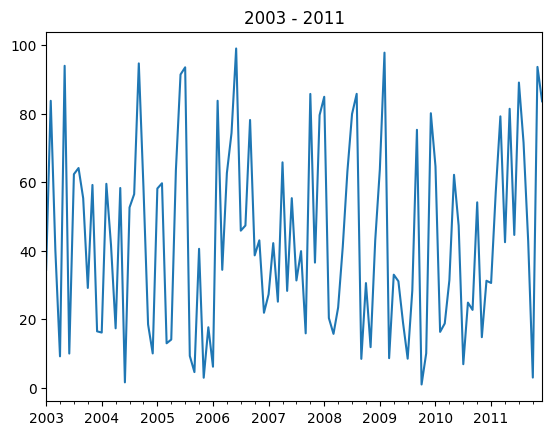

In [54]:
# 시작연도와 종료 연도를 정의하고 연단위로 데이터를 시각화
start = '2003'
end = '2011'
data[start:end].plot()
plt.title(f"{start} - {end}")
plt.show()

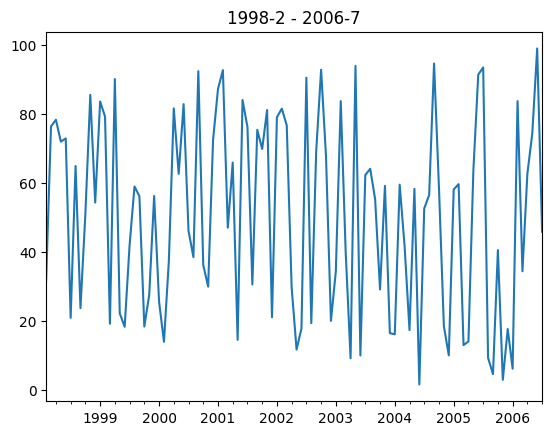

In [55]:
# 월단위로 시각화
start = '1998-2'
end = '2006-7'
data[start:end].plot()
plt.title(f"{start} - {end}")
plt.show()

시계열 데이터에서 작업 수행하기

In [56]:
#  3번째외 4번째 열을 각각 변수로 처리
x1 = read_data(filepath,2)
x2 = read_data(filepath,3)

In [57]:
# 데이터 프레임으로 변환
data = pd.DataFrame({'dim1':x1,'dim2':x2})
data.head()

,dim1,dim2
1900-01-31,97.91,73.28
1900-02-28,86.80,63.82
1900-03-31,3.56,51.84
1900-04-30,7.22,82.13
1900-05-31,46.78,15.81


<Axes: >

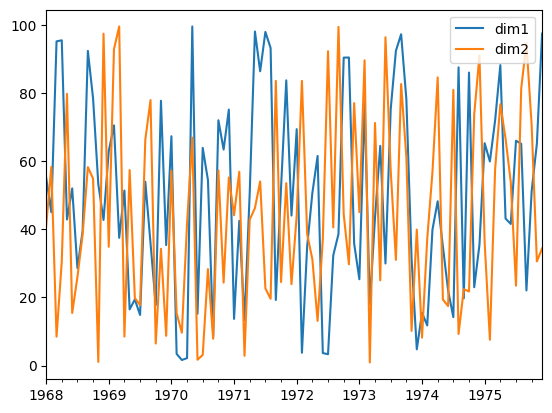

In [58]:
# 시작연도와 끝연도를 설정
start = '1968'
end = '1975'
data[start:end].plot()

<Axes: >

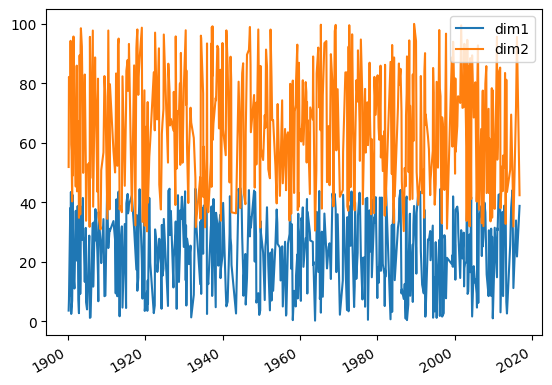

In [60]:
# 데이터를 필터링
data[(data['dim1'] < 45) & (data['dim2'] > 30)].plot()

<Axes: >

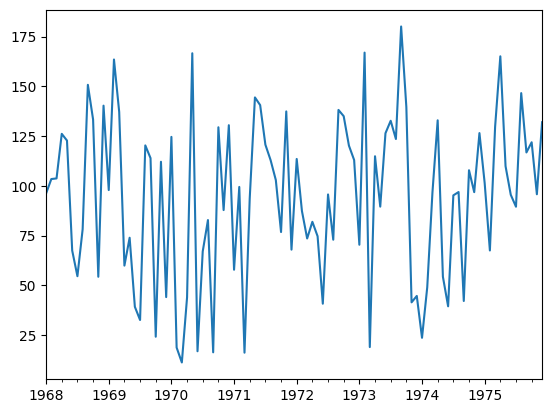

In [61]:
diff = data[start:end]['dim1'] + data[start:end]['dim2']
diff.plot()

시계열 데이터에서 통계추출
  - 윈도우를 사용해서 롤링방식으로 계산 

In [62]:
# 2와 3 인덱스 컬럼을 각각 변수(독립변수로)로 추출하고
# 판다스 형태로 변환
data.head()

,dim1,dim2
1900-01-31,97.91,73.28
1900-02-28,86.80,63.82
1900-03-31,3.56,51.84
1900-04-30,7.22,82.13
1900-05-31,46.78,15.81


In [64]:
# 최대값과 최소값을 추출
print(data.max())
print(data.min())

dim1    99.98
dim2    99.97
dtype: float64
dim1    0.18
dim2    0.16
dtype: float64


In [67]:
# 전체 평균
print(f"total mean : ")
data.mean()

total mean : 


dim1    49.030541
dim2    50.983291
dtype: float64

In [70]:
# 행별 평균
data.mean(axis=1)[:12]

1900-01-31    85.595
1900-02-28    75.310
1900-03-31    27.700
1900-04-30    44.675
1900-05-31    31.295
1900-06-30    44.160
1900-07-31    67.415
1900-08-31    56.160
1900-09-30    51.495
1900-10-31    61.260
1900-11-30    30.925
1900-12-31    30.785
Freq: M, dtype: float64

In [71]:
# 시계열 데이터에서 적절한 위도우 사이즈는 : 대략 년단위 또는 월 단위
# 윈도우 사이즈를 12를 사용

In [73]:
data.rolling(window=12).mean().head(15)

,dim1,dim2
1900-01-31,NaN,NaN
1900-02-28,NaN,NaN
1900-03-31,NaN,NaN
1900-04-30,NaN,NaN
1900-05-31,NaN,NaN
1900-06-30,NaN,NaN
1900-07-31,NaN,NaN
1900-08-31,NaN,NaN
1900-09-30,NaN,NaN
1900-10-31,NaN,NaN


<Axes: >

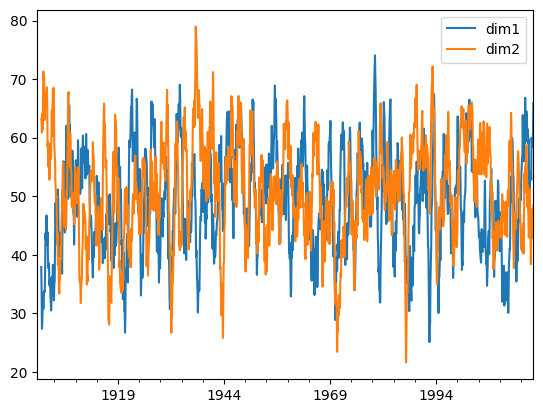

In [74]:
data.rolling(window=12).mean().plot()

In [75]:
# 상관계수 출력
data.corr()

,dim1,dim2
dim1,1.00000,0.00627
dim2,0.00627,1.00000


In [78]:
data.rolling(window=60).mean().corr()

,dim1,dim2
dim1,1.000000,0.059921
dim2,0.059921,1.000000


은닉 마르코프 모델 : HMM
   - 시계열 데이터를 분석하기 위한 기술
   - 시계열 데이터의 가장 큰 특징은 상태가 숨겨져 있다

   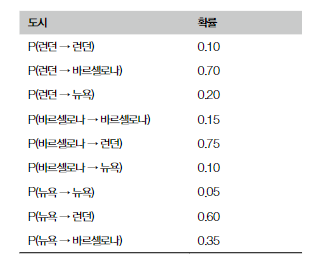

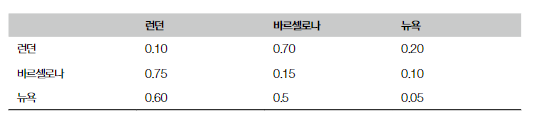

In [79]:
import datetime
from hmmlearn.hmm import GaussianHMM

In [80]:
# 데이터 로드
filepath = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/data_31_hmm.txt'

In [86]:
data = np.loadtxt(filepath,delimiter=',')
data.shape

(2604, 3)

In [98]:
# 학습을 위한 마지막 열을 추출한다.
X = np.column_stack( [data[:,-1]])
X.shape

(2604, 1)

In [99]:
hmm = GaussianHMM(n_components=5,covariance_type='diag',n_iter = 1000)

In [100]:
hmm.fit(X)

GaussianHMM(n_components=5, n_iter=1000)

In [104]:
# hmm 상태 출력
print('Mean and variances')
for i in range(hmm.n_components):
  print(f'Hidden state : {i+1}')
  print(f'Mean = {round(hmm.means_[i][0], 2)}')
  print(f'Variance = {round(np.diag(hmm.covars_[i])[0],2)}')

Mean and variances
Hidden state : 1
Mean = 1.59
Variance = 1.22
Hidden state : 2
Mean = 1.6
Variance = 1.26
Hidden state : 3
Mean = 7.58
Variance = 1.27
Hidden state : 4
Mean = 1.61
Variance = 1.29
Hidden state : 5
Mean = 4.6
Variance = 0.26


주식시장 분석하기

In [106]:
import yfinance as yf

In [107]:
# 1970 9 4 ~ 2016 5 17 시세를 로드
start_date =  datetime.date(1970,9,4)
end_date = datetime.date(2016,5,17)
intc = yf.Ticker('INTC').history(start=start_date, end=end_date)
intc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.185199,0.188162,0.185199,0.185199,10924800,0.0,0.0
1980-03-18 00:00:00-05:00,0.185199,0.186681,0.183718,0.183718,17068800,0.0,0.0
1980-03-19 00:00:00-05:00,0.188162,0.191126,0.188162,0.188162,18508800,0.0,0.0
1980-03-20 00:00:00-05:00,0.188162,0.190385,0.187422,0.187422,11174400,0.0,0.0
1980-03-21 00:00:00-05:00,0.183718,0.183718,0.180754,0.180754,12172800,0.0,0.0
...,...,...,...,...,...,...,...
2016-05-10 00:00:00-04:00,24.616443,24.764142,24.468744,24.731319,17013800,0.0,0.0
2016-05-11 00:00:00-04:00,24.747727,24.821577,24.591823,24.665672,15754200,0.0,0.0
2016-05-12 00:00:00-04:00,24.706702,24.813373,24.263605,24.419510,20826700,0.0,0.0


In [ ]:
# 매일 종가의 백분율 차이를 확인
diff_percentage = 100.0 * np.diff(intc.Close) / intc.Close[:-1]
diff_percentage

In [111]:
# 두 데이터를 쌓아서 훈련 데이터 세트를 생성
training_data = np.column_stack([diff_percentage,intc.Volume[:-1]])
training_data

array([[-7.99934795e-01,  1.09248000e+07],
       [ 2.41914795e+00,  1.70688000e+07],
       [-3.93637558e-01,  1.85088000e+07],
       ...,
       [-9.97995966e-01,  1.57542000e+07],
       [ 5.04035974e-01,  2.08267000e+07],
       [ 1.60480135e+00,  1.99996000e+07]])

In [112]:
# 7개 성분과 대각 공분산을 사용해서 가우시안 HMM을 만들고 훈련

In [113]:
hmm = GaussianHMM(n_components=7)
hmm.fit(training_data)

GaussianHMM(n_components=7)

In [115]:
# hmm모델을 사용해서 데이터  생성
num_samples = 300
samples,_ = hmm.sample(num_samples)

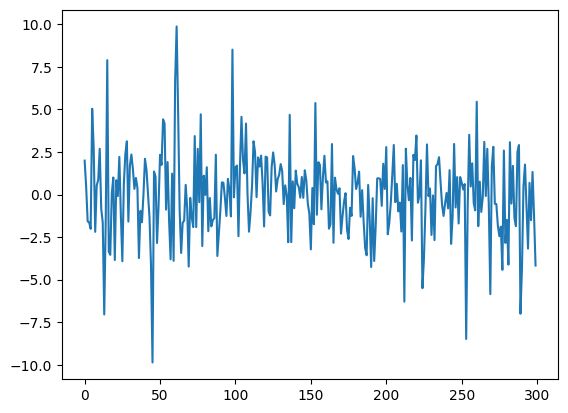

In [116]:
# 생성된 백분율의 차이를 그린다
plt.plot(np.arange(num_samples), samples[:,0])

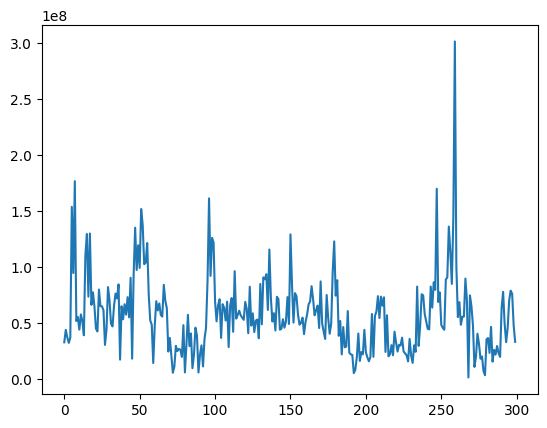

In [118]:
# 거래된 주식의 양
plt.plot(np.arange(num_samples), samples[:,1])